<h1><center><font color='red'> Jeopardy (ML Engineer Mini Project) </font></center></h1>

<img src="jeopardy.png">

## Introduction

Jeopardy! is an American television game show created by Merv Griffin. The show features a quiz competition in which contestants are presented with general knowledge clues in the form of answers, and must phrase their responses in the form of questions. The original daytime version debuted on NBC on March 30, 1964, and aired until January 3, 1975. A weekly nighttime syndicated edition aired from September 1974 to September 1975, and a revival, The All-New Jeopardy!, ran on NBC from October 1978 to March 1979. The version airing as of 2021, a daily syndicated show produced by Sony Pictures Television, premiered on September 10, 1984.

Both NBC versions and the weekly syndicated version were hosted by Art Fleming. Don Pardo served as announcer until 1975, and John Harlan announced for the 1978–1979 season. The daily syndicated version featured Alex Trebek as host from 1984 until his death in 2020; his last episode as host aired January 8, 2021. A series of interim hosts will moderate the program, with consulting producer and former contestant Ken Jennings beginning with the November 30, 2020 taping. Johnny Gilbert has been the announcer since 1984.

With over 8,000 episodes aired, the daily syndicated version of Jeopardy! has won a record 39 Daytime Emmy Awards as well as a Peabody Award. In 2013, the program was ranked No. 45 on TV Guide's list of the 60 greatest shows in American television history. Jeopardy! has also gained a worldwide following with regional adaptations in many other countries. The daily syndicated series' 37th season premiered on September 14, 2020.

## Source : https://www.kaggle.com/tunguz/200000-jeopardy-questions

## Problem Statemtent

<b> As part of this Mini Project, we have to build a model to predict the value of the question in the TV game show "Jeopardy!" </b>

## Data Description

Columns:

    category : the question category, e.g. "HISTORY" 

    value : $ value of the question as string, e.g. "$200" (Note - "None" for Final Jeopardy! and Tiebreaker questions)

    question : text of question (Note: This sometimes contains hyperlinks and other things messy text such as when there's a picture or video question)

    answer : text of answer 

    round : one of "Jeopardy!", "Double Jeopardy!", "Final Jeopardy!" or "Tiebreaker" (Note: Tiebreaker questions do happen but they're very rare (like once every 20 years)

    show_number : string of show number, e.g '4680' 

    air_date : the show air date in format YYYY-MM-DD

## Business objectives and constraints

1. The cost of a misclassification can be high.
2. There is no strict latency concerns.
3. This model can be also used for similar quiz based TV shows around the globe.

## Importing Liabraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import itertools
from bs4 import BeautifulSoup
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Exploratory Data Analysis

Loading the Dataset in a DataFrame

In [5]:
jeopardy_df = pd.read_csv("JEOPARDY_CSV.csv")
jeopardy_df.head(10)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect sh...",the ant
6,4680,2004-12-31,Jeopardy!,HISTORY,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$400,This housewares store was named for the packag...,Crate & Barrel


Checking the shape of the Dataset

In [6]:
jeopardy_df.shape

(216930, 7)

Checking the columns present in the Dataset

In [7]:
jeopardy_df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

The major problem with the Dataset is there are some column name that have a single space in front of them, so to simplify the whole process, we will change the names or in other words we will remove the spaces.

In [8]:
jeopardy_df = jeopardy_df.rename(columns = {" Air Date" : "Air Date", " Round" : "Round", " Category" : "Category", " Value" : "Value", " Question" : "Question", " Answer" : "Answer"}, inplace = False)

In [9]:
jeopardy_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [10]:
jeopardy_df.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

Checking the informations about the Dataset

In [11]:
jeopardy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1   Air Date     216930 non-null  object
 2   Round        216930 non-null  object
 3   Category     216930 non-null  object
 4   Value        216930 non-null  object
 5   Question     216930 non-null  object
 6   Answer       216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


Checking the description about the Dataset

In [12]:
jeopardy_df.describe()

,Show Number
count,216930.000000
mean,4264.238519
std,1386.296335
min,1.000000
25%,3349.000000
50%,4490.000000
75%,5393.000000
max,6300.000000


Checking, if there is any null values present in the Dataset of not

In [13]:
jeopardy_df.isnull().sum()

Show Number    0
Air Date       0
Round          0
Category       0
Value          0
Question       0
Answer         2
dtype: int64

As we can see from the above there is some missing/null values present in the Dataset, so we will have to remove those.

In [14]:
jeopardy_df = jeopardy_df[jeopardy_df["Answer"].notna()]

In [15]:
jeopardy_df.isnull().sum()

Show Number    0
Air Date       0
Round          0
Category       0
Value          0
Question       0
Answer         0
dtype: int64

As we can see from above, now there is not missing values present in the Dataset.

Now we are Checking how many type of Rounds are there in the Jeopardy Game Show

In [16]:
jeopardy_df["Round"].unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!', 'Tiebreaker'],
      dtype=object)

We are checking the number of types of the Rounds

In [17]:
jeopardy_df["Round"].value_counts()

Jeopardy!           107383
Double Jeopardy!    105911
Final Jeopardy!       3631
Tiebreaker               3
Name: Round, dtype: int64

## Data Visualization

### Pie Chart

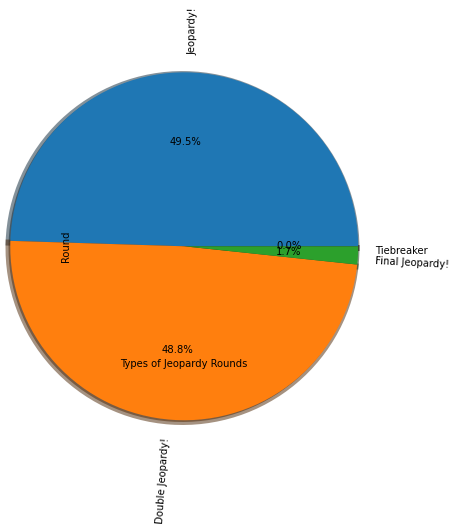

In [18]:
(jeopardy_df["Round"].value_counts()[:15]).plot.pie(autopct="%.1f%%", shadow=True, rotatelabels=True, wedgeprops={'linewidth': 6}, radius=2)
plt.xlabel('Types of Jeopardy Rounds')
plt.show()

From the above Pie plot we can clearly say that, the Majority of the Rounds are Jeoparty and Double Jeoparty making almost of 98.3% chunk of shares and Tie Breakers are very very very RARE.

Now we are checking the different types of Values or Prices for the Question

In [19]:
jeopardy_df["Value"].unique()

array(['$200', '$400', '$600', '$800', '$2,000', '$1000', '$1200',
       '$1600', '$2000', '$3,200', 'None', '$5,000', '$100', '$300',
       '$500', '$1,000', '$1,500', '$1,200', '$4,800', '$1,800', '$1,100',
       '$2,200', '$3,400', '$3,000', '$4,000', '$1,600', '$6,800',
       '$1,900', '$3,100', '$700', '$1,400', '$2,800', '$8,000', '$6,000',
       '$2,400', '$12,000', '$3,800', '$2,500', '$6,200', '$10,000',
       '$7,000', '$1,492', '$7,400', '$1,300', '$7,200', '$2,600',
       '$3,300', '$5,400', '$4,500', '$2,100', '$900', '$3,600', '$2,127',
       '$367', '$4,400', '$3,500', '$2,900', '$3,900', '$4,100', '$4,600',
       '$10,800', '$2,300', '$5,600', '$1,111', '$8,200', '$5,800',
       '$750', '$7,500', '$1,700', '$9,000', '$6,100', '$1,020', '$4,700',
       '$2,021', '$5,200', '$3,389', '$4,200', '$5', '$2,001', '$1,263',
       '$4,637', '$3,201', '$6,600', '$3,700', '$2,990', '$5,500',
       '$14,000', '$2,700', '$6,400', '$350', '$8,600', '$6,300', '$250',
    

In [20]:
jeopardy_df["Value"].value_counts()

$400      42243
$800      31860
$200      30454
$600      20377
$1000     19539
          ...  
$2,127        1
$796          1
$50           1
$2,990        1
$2,021        1
Name: Value, Length: 150, dtype: int64

### Horizontal Bar Plot

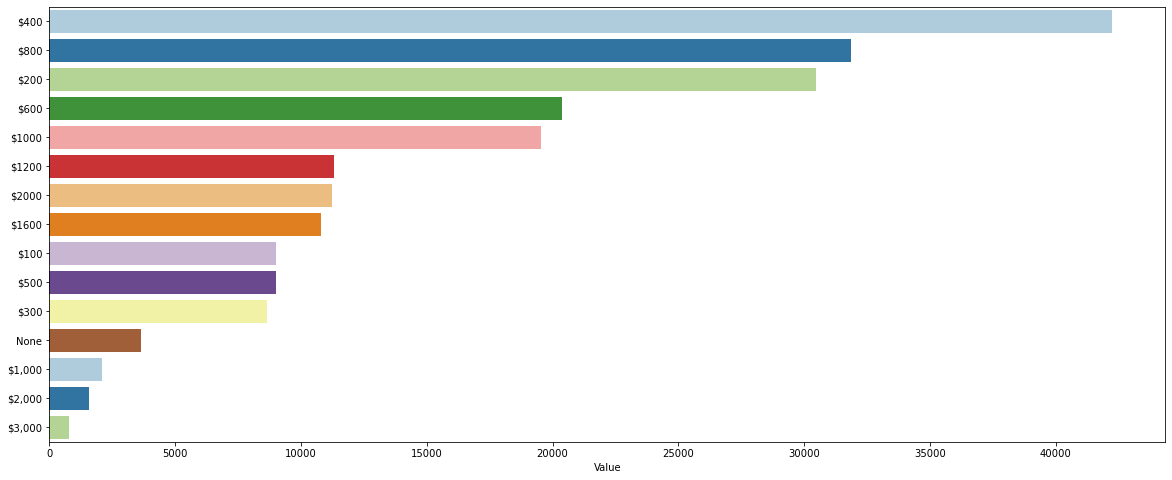

In [21]:
plt.figure(figsize = (20,8))
values = jeopardy_df['Value'].value_counts()[:15]
sns.barplot(x = values, y = values.index, palette = 'Paired')

Now, we can see from the above Bar Plot, there are maximum questions with the values 400,800,200 Dollars and the least number of values are 1000,2000,3000 Dollars.

In [22]:
jeopardy_df["Answer"].value_counts()[:15]

China         216
Australia     215
Japan         196
Chicago       194
France        193
India         185
California    180
Canada        176
Spain         171
Mexico        164
Alaska        161
Italy         160
Hawaii        157
Texas         153
Paris         149
Name: Answer, dtype: int64

By checking the most popular 15 Answers contains China, Australia, Japan etc. Fun Fact all the top 15 Answers are belongs to different places around the globe.

### Horizontal Bar Plot

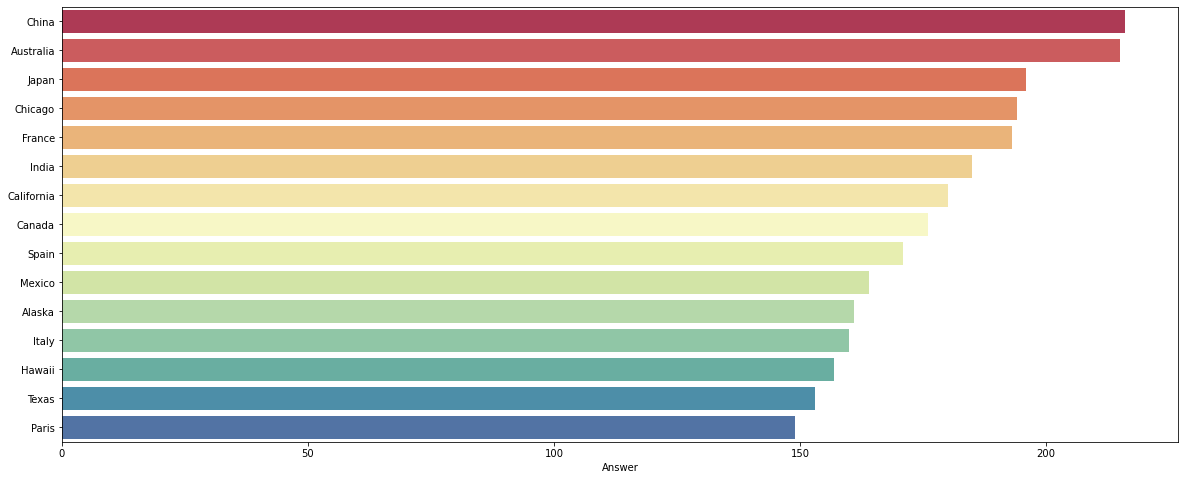

In [23]:
plt.figure(figsize = (20,8))
values = jeopardy_df['Answer'].value_counts()[:15]
sns.barplot(x = values, y = values.index, palette = 'Spectral')

### Word Cloud

Now we are plotting the Most used Answers present in the Dataset

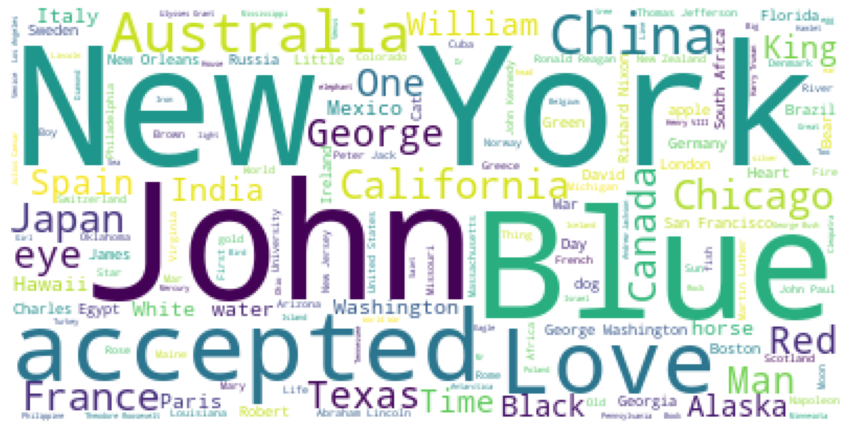

In [24]:
text = ' '.join(jeopardy_df['Answer'])
wordcloud = WordCloud(background_color ='white').generate(text)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
jeopardy_df["Question"].value_counts()[:15]

[audio clue]         17
[video clue]         14
[filler]              5
(audio clue)          5
Abigail Smith         4
Greenland             4
Hainan                4
"I Hope I Get It"     3
Dick Cheney           3
Egypt                 3
Baffin Island         3
Melanie Griffith      3
Charlie Parker        3
Walk like a duck      3
"Charlie Hustle"      3
Name: Question, dtype: int64

Now we are checking the top 15 most occurring Questions from the Dataset. Fun Fact the majority of the Questions are from Audio and Video clues

### Horizontal Bar Plot

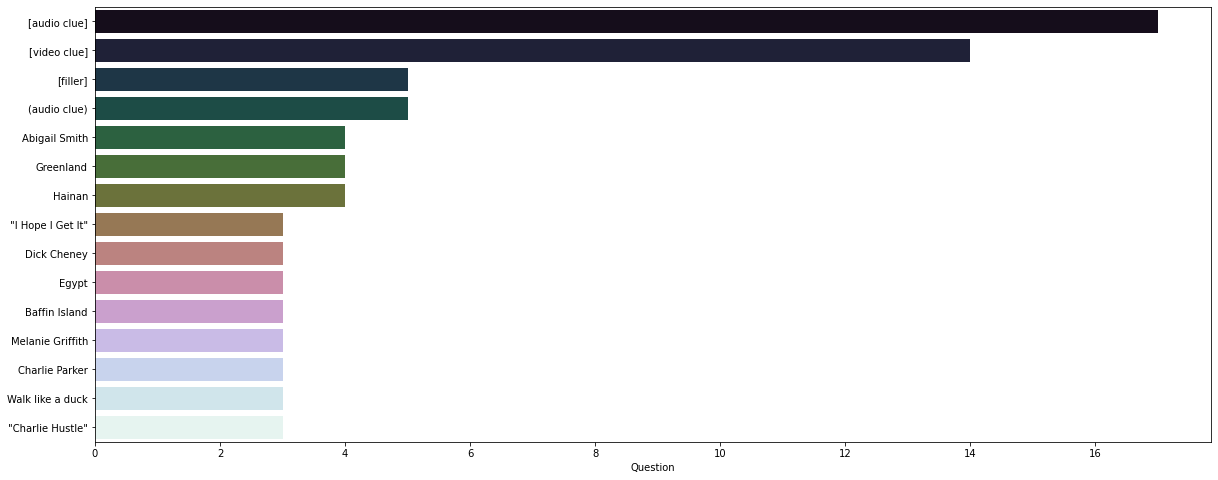

In [26]:
plt.figure(figsize = (20,8))
values = jeopardy_df['Question'].value_counts()[:15]
sns.barplot(x = values, y = values.index, palette = 'cubehelix')

### Word Cloud

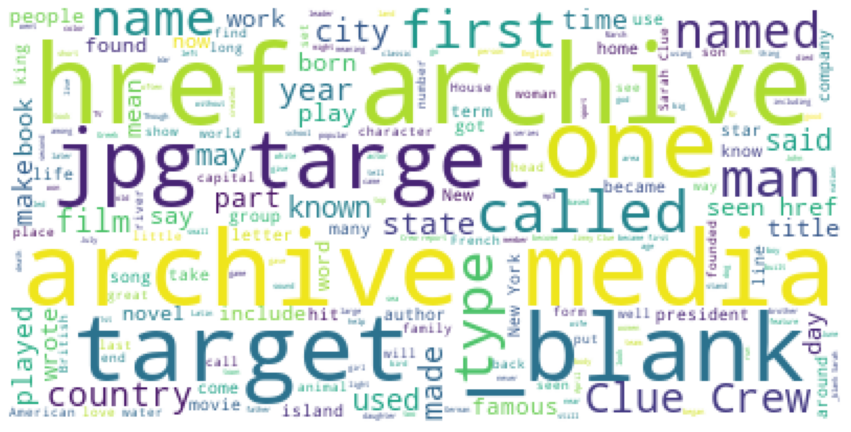

In [27]:
text = ' '.join(jeopardy_df['Question'])
wordcloud = WordCloud(background_color = 'white').generate(text)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Now we are plotting the Most used words prsent in the Questions

In [28]:
jeopardy_df['Value'].head()

0    $200
1    $200
2    $200
3    $200
4    $200
Name: Value, dtype: object

As we can see the values are in Dollars, so we have to remove the dollar sign and the spaces before convert it to an integer from String

In [29]:
jeopardy_df['Value'] = jeopardy_df['Value'].str.replace(',', '')
jeopardy_df['Value'] = jeopardy_df['Value'].str.replace('$', '')

There are a single section called None, so we will also remove this, otherwise we can't make it an integer

In [30]:
jeopardy_df.drop(jeopardy_df[jeopardy_df['Value'] == 'None'].index, inplace=True)

Now, we are checking the different types of modifies values

In [31]:
jeopardy_df['Value'].unique()

array(['200', '400', '600', '800', '2000', '1000', '1200', '1600', '3200',
       '5000', '100', '300', '500', '1500', '4800', '1800', '1100',
       '2200', '3400', '3000', '4000', '6800', '1900', '3100', '700',
       '1400', '2800', '8000', '6000', '2400', '12000', '3800', '2500',
       '6200', '10000', '7000', '1492', '7400', '1300', '7200', '2600',
       '3300', '5400', '4500', '2100', '900', '3600', '2127', '367',
       '4400', '3500', '2900', '3900', '4100', '4600', '10800', '2300',
       '5600', '1111', '8200', '5800', '750', '7500', '1700', '9000',
       '6100', '1020', '4700', '2021', '5200', '3389', '4200', '5',
       '2001', '1263', '4637', '3201', '6600', '3700', '2990', '5500',
       '14000', '2700', '6400', '350', '8600', '6300', '250', '3989',
       '8917', '9500', '1246', '6435', '8800', '2222', '2746', '10400',
       '7600', '6700', '5100', '13200', '4300', '1407', '12400', '5401',
       '7800', '1183', '1203', '13000', '11600', '14200', '1809', '8400',
    

We are converting Values(string) to Values (integers)

In [32]:
jeopardy_df['Value'] = jeopardy_df['Value'].astype(int)

Because we have so many different types of valus we will change them by rounding off them to nearest hundres to reduce the complexity of the project

In [33]:
def binning(Value):
    if Value < 1000:
        return np.round(Value, -2)
    elif Value < 10000:
        return np.round(Value, -3)
    else:
        return np.round(Value, -4)

jeopardy_df['Value_Bins'] = jeopardy_df['Value'].apply(binning)

Now we have only 21 classes, it will help us to fosuc on the main sections

In [34]:
jeopardy_df['Value_Bins'].unique()

array([  200,   400,   600,   800,  2000,  1000,  3000,  5000,   100,
         300,   500,  4000,  7000,   700,  8000,  6000, 10000,   900,
        9000,     0, 20000], dtype=int64)

In [35]:
jeopardy_df['Value_Bins'].value_counts()

400      42246
1000     33789
800      31865
200      30459
2000     25232
600      20379
100       9029
500       9016
300       8663
3000      1077
4000       585
5000       322
700        203
6000       138
900        114
7000        60
10000       45
8000        43
9000        15
0           12
20000        2
Name: Value_Bins, dtype: int64

### Vertical Bar Plot

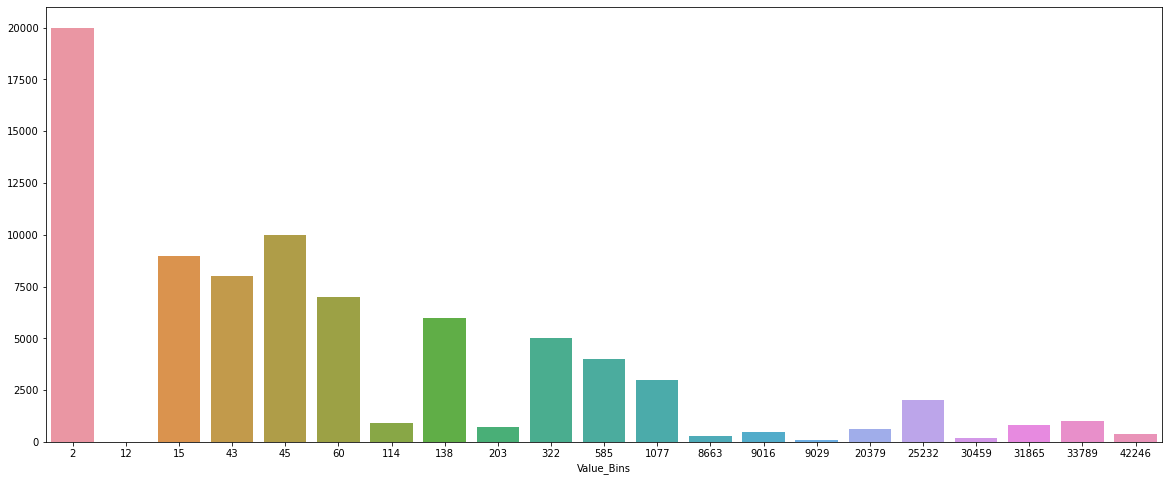

In [36]:
plt.figure(figsize = (20,8))
values = jeopardy_df['Value_Bins'].value_counts()
sns.barplot(x = values, y = values.index)

In [37]:
jeopardy_df['Value_Bins'].nunique()

21

As we can see, there is a class which have a question valu of 0. Because we have so much Data, we will just simply remove them

In [38]:
jeopardy_df.drop(jeopardy_df[jeopardy_df['Value_Bins'] == 0].index, inplace = True) 

Now, we have only 20 classes which is represeting the whole Dataset

In [39]:
jeopardy_df['Value_Bins'].nunique()

20

As we can clearly see the most common question values are 400,1000,800 and the least are 20000,9000,8000

In [40]:
jeopardy_df['Value_Bins'].value_counts()

400      42246
1000     33789
800      31865
200      30459
2000     25232
600      20379
100       9029
500       9016
300       8663
3000      1077
4000       585
5000       322
700        203
6000       138
900        114
7000        60
10000       45
8000        43
9000        15
20000        2
Name: Value_Bins, dtype: int64

### Calculating correlation between features

We will calculate the correlation between all the features

In [41]:
jeopardy_df.corr()

,Show Number,Value,Value_Bins
Show Number,1.000000,0.301876,0.299388
Value,0.301876,1.000000,0.985819
Value_Bins,0.299388,0.985819,1.000000


### Heat Map

We will generate a Heat Map for the correlation between features

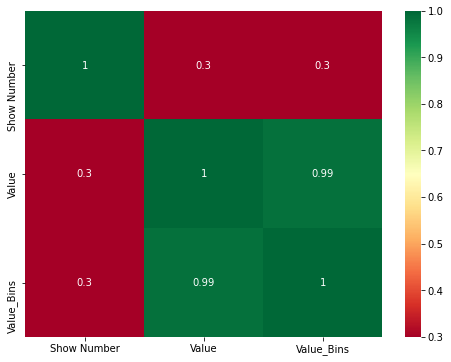

In [42]:
plt.figure(figsize = (8,6))
sns.heatmap(jeopardy_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

## Data Preprocessing

Data Preprocessing is one of the most important steps. Now we will discart the HTML, Punctuation, converting every word to lowercase etc

In [43]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [44]:
jeopardy_df['Question'] = jeopardy_df['Question'].str.lower()
jeopardy_df['Question'] = jeopardy_df['Question'].apply(cleanHtml)
jeopardy_df['Question'] = jeopardy_df['Question'].apply(cleanPunc)
jeopardy_df['Question'] = jeopardy_df['Question'].apply(keepAlpha)
jeopardy_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,Value_Bins
0,4680,2004-12-31,Jeopardy!,HISTORY,200,for the last years of his life galileo was u...,Copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,no olympian football star at carlisle ind...,Jim Thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,the city of yuma in this state has a record av...,Arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,in live on the art linkletter show this comp...,McDonald's,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,signer of the dec of indep framer of the const...,John Adams,200


Now we are removing stopwords from the Dataset

In [45]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

jeopardy_df['Question'] = jeopardy_df['Question'].apply(removeStopWords)
jeopardy_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,Value_Bins
0,4680,2004-12-31,Jeopardy!,HISTORY,200,last years life galileo house arrest ...,Copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,olympian football star carlisle indian ...,Jim Thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,city yuma state record average hour...,Arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,live art linkletter show company served ...,McDonald's,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,signer dec indep framer constitution mas...,John Adams,200


Now we are using Snow Ball Stemmer to improve the pre processing

In [46]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

jeopardy_df['Question'] = jeopardy_df['Question'].apply(stemming)
jeopardy_df.head(10)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Value_Bins
0,4680,2004-12-31,Jeopardy!,HISTORY,200,last year life galileo hous arrest espous man ...,Copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,olympian footbal star carlisl indian school ml...,Jim Thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,citi yuma state record averag hour sunshin year,Arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,live art linklett show compani serv billionth ...,McDonald's,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,signer dec indep framer constitut mass second ...,John Adams,200
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,200,titl aesop fabl insect share bill grasshopp,the ant,200
6,4680,2004-12-31,Jeopardy!,HISTORY,400,built b c link rome south itali still use today,the Appian Way,400
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,400,steal birmingham baron steal bull,Michael Jordan,400
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,400,winter record inch snow fell rainier paradis r...,Washington,400
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,400,housewar store name packag merchandis came fir...,Crate & Barrel,400


### BOW

In [47]:
count_vect = CountVectorizer()
count_vect.fit(jeopardy_df['Question'])
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
final_counts = count_vect.transform(jeopardy_df['Question'])
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaaaaaaay', 'aaaaaaaaaaay', 'aaaaaaaaay', 'aaaaaay', 'aaaaah', 'aaaack']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (213282, 62813)
the number of unique words  62813


In [48]:
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
final_bigram_counts = count_vect.fit_transform(jeopardy_df['Question'])
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (213282, 5000)
the number of unique words including both unigrams and bigrams  5000


### TF-IDF

In [49]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(jeopardy_df['Question'])
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)
final_tf_idf = tf_idf_vect.transform(jeopardy_df['Question'])
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['aa', 'aaron', 'aaron burr', 'ab', 'aba', 'ababa', 'abandon', 'abba', 'abbey', 'abbi']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (213282, 23285)
the number of unique words including both unigrams and bigrams  23285


Here we have vectorized the words, build the dictionary and also use techniques like Bag of Words, TF-IDF

## Model Building

Now we will build the Machine Learning models

In [50]:
X = jeopardy_df['Question']
y = jeopardy_df['Value_Bins']

In [53]:
tfidf = TfidfVectorizer(stop_words = 'english')
X = tfidf.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142898, 62592)
(70384, 62592)
(142898,)
(70384,)


From the above we can clearly see the Train-Test split for training an testing the models

Here, we will use Logistic regression, Decesion Tree and Random Forest

### Logistic Regression

In [55]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred = logreg.predict(X_test)
y_pred

array([1000, 1000,  800, ...,  800,  400,  400], dtype=int64)

This is the Classification report for Logistic Regression

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         100       0.13      0.00      0.01      2922
         200       0.17      0.19      0.18     10121
         300       0.00      0.00      0.00      2770
         400       0.20      0.44      0.28     13921
         500       0.16      0.00      0.00      2956
         600       0.09      0.02      0.03      6636
         700       0.00      0.00      0.00        61
         800       0.15      0.13      0.14     10734
         900       0.00      0.00      0.00        31
        1000       0.17      0.18      0.18     11136
        2000       0.17      0.13      0.15      8308
        3000       0.00      0.00      0.00       369
        4000       0.00      0.00      0.00       214
        5000       0.00      0.00      0.00       109
        6000       0.00      0.00      0.00        42
        7000       0.00      0.00      0.00        18
        8000       0.00      0.00      0.00        13
        9000       0.00    

Here we are plotting the Confusion Matrix by using the Heat Maps for Logistic Regression

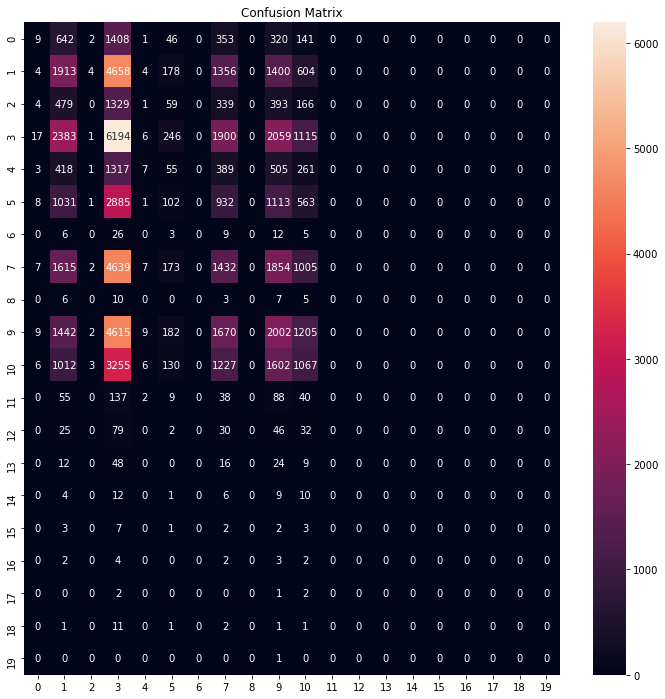

In [58]:
df_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,12))
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classifier

In [59]:
rf = RandomForestClassifier(random_state = 1, max_depth = 5)
rf = rf.fit(X_train,y_train)

In [60]:
y_pred = rf.predict(X_test)
y_pred

array([400, 400, 400, ..., 400, 400, 400], dtype=int64)

This is the Classification report for Random Forest

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         100       0.00      0.00      0.00      2922
         200       0.00      0.00      0.00     10121
         300       0.00      0.00      0.00      2770
         400       0.20      1.00      0.33     13921
         500       0.00      0.00      0.00      2956
         600       0.00      0.00      0.00      6636
         700       0.00      0.00      0.00        61
         800       0.00      0.00      0.00     10734
         900       0.00      0.00      0.00        31
        1000       0.00      0.00      0.00     11136
        2000       0.00      0.00      0.00      8308
        3000       0.00      0.00      0.00       369
        4000       0.00      0.00      0.00       214
        5000       0.00      0.00      0.00       109
        6000       0.00      0.00      0.00        42
        7000       0.00      0.00      0.00        18
        8000       0.00      0.00      0.00        13
        9000       0.00    

Here we are plotting the Confusion Matrix by using the Heat Maps for Random Forest

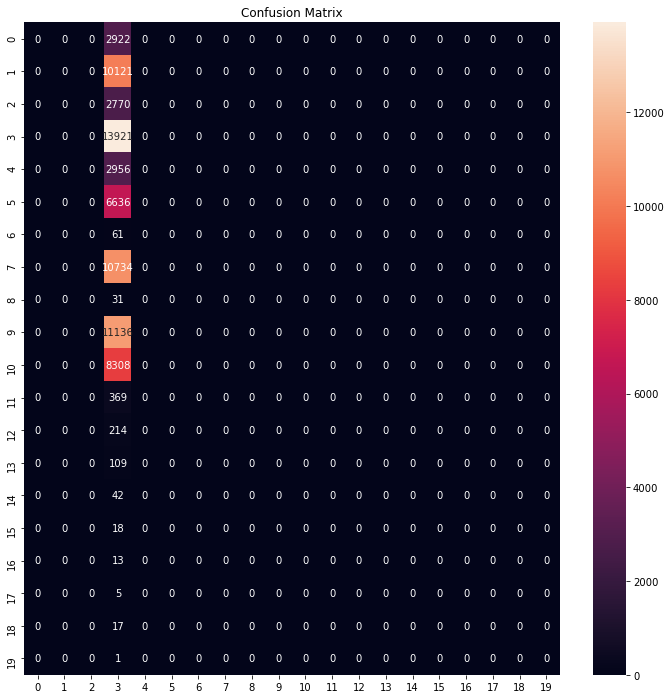

In [62]:
df_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,12))
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### Decision Tree Classifier

In [63]:
dtc = DecisionTreeClassifier(random_state = 1, max_depth = 5)
dtc = dtc.fit(X_train,y_train)

In [64]:
y_pred = dtc.predict(X_test)
y_pred

array([400, 400, 400, ..., 400, 400, 400], dtype=int64)

This is the Classification report for Decision Tree

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         100       0.00      0.00      0.00      2922
         200       0.00      0.00      0.00     10121
         300       0.00      0.00      0.00      2770
         400       0.20      0.98      0.33     13921
         500       0.00      0.00      0.00      2956
         600       0.00      0.00      0.00      6636
         700       0.00      0.00      0.00        61
         800       0.14      0.00      0.00     10734
         900       0.00      0.00      0.00        31
        1000       0.23      0.03      0.06     11136
        2000       0.27      0.00      0.01      8308
        3000       0.00      0.00      0.00       369
        4000       0.00      0.00      0.00       214
        5000       0.00      0.00      0.00       109
        6000       0.00      0.00      0.00        42
        7000       0.00      0.00      0.00        18
        8000       0.00      0.00      0.00        13
        9000       0.00    

Here we are plotting the Confusion Matrix by using the Heat Maps for Decision Tree

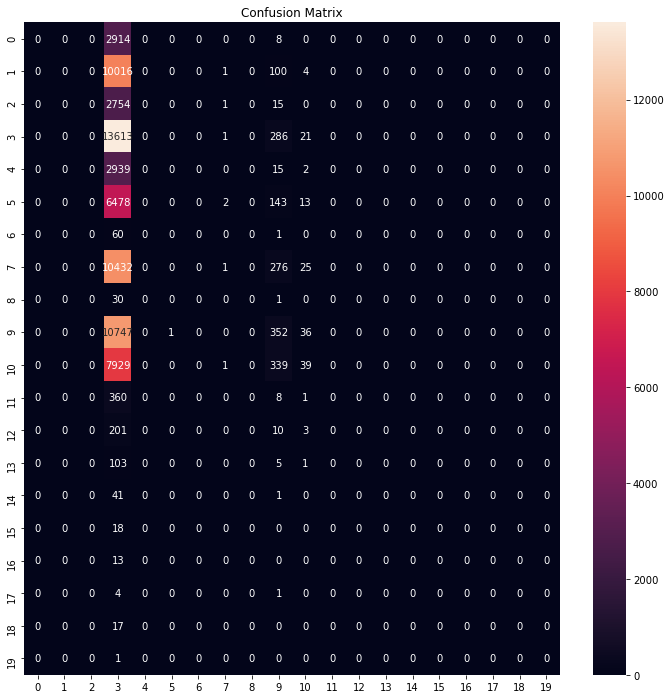

In [66]:
df_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,12))
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Conclusion

* As we can clearly see from the above different ML models none of them can perfrom good for this dataset.

* We can clearly use hyperparameter tunning to get more accuracy.

* Use can use advanced techniques like W2Vec and W2Vec TF-IDF etc.

* We can use Deep Learning Models and tune them to perfection to get a decent accuracy.

* By using decent computaion power, we can imporve a lot of thingsand the performance of the Models.